In [459]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
pd.set_option("display.max_columns",30)
pd.set_option("display.max_colwidth",None)
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import pipeline

# Project
## Income Risk Loan Prediction

* This project uses machine learning to predict whether a loan should be granted based on demographic and financial behavior features. It leverages a clean and efficient `scikit-learn` pipeline to preprocess data and train a logistic regression model.


In [460]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\risk_behavior_features.csv")

# Data Info

In [461]:
df.head()

,Age,Gender,Education Level,Marital Status,Number of Dependents,Income,Credit Score,Debt-to-Income Ratio,Assets Value,Defaults Records,Employment Status,Years in Current Job
0,36,Female,Bachelor's,Divorced,2,56789,715,0.25,158765,2,Employed,6
1,37,Non-binary,Master's,Single,3,91234,789,0.18,176543,0,Employed,10
2,45,Male,Bachelor's,Divorced,1,65432,723,0.25,134567,1,Employed,6
3,39,Male,Master's,Single,0,92345,801,0.15,192345,0,Employed,10
4,40,Female,Master's,Married,1,76543,756,0.22,162345,0,Employed,8


In [462]:
df.tail()

,Age,Gender,Education Level,Marital Status,Number of Dependents,Income,Credit Score,Debt-to-Income Ratio,Assets Value,Defaults Records,Employment Status,Years in Current Job
68,23,Male,Master's,Single,0,28906,724,0.50,96640,0,Unemployed,1
69,22,Male,Master's,Single,0,104766,764,0.21,156630,3,Employed,10
70,41,Female,Doctorate,Widowed,0,79556,742,0.32,247857,4,Employed,10
71,47,Male,Bachelor's,Single,4,116102,629,0.52,228018,2,Employed,10
72,42,Male,High School or Below,Married,2,32094,634,0.55,114375,2,Employed,10


In [463]:
df.shape

(73, 12)

In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   73 non-null     int64  
 1   Gender                73 non-null     object 
 2   Education Level       73 non-null     object 
 3   Marital Status        73 non-null     object 
 4   Number of Dependents  73 non-null     int64  
 5   Income                73 non-null     int64  
 6   Credit Score          73 non-null     int64  
 7   Debt-to-Income Ratio  73 non-null     float64
 8   Assets Value          73 non-null     int64  
 9   Defaults Records      73 non-null     int64  
 10  Employment Status     73 non-null     object 
 11  Years in Current Job  73 non-null     int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 7.0+ KB


In [465]:
df.dtypes

Age                       int64
Gender                   object
Education Level          object
Marital Status           object
Number of Dependents      int64
Income                    int64
Credit Score              int64
Debt-to-Income Ratio    float64
Assets Value              int64
Defaults Records          int64
Employment Status        object
Years in Current Job      int64
dtype: object

# Data Handling & Cleaning

In [466]:
df["Loan Granted"]=df["Credit Score"].apply(lambda x: "yes" if x>= 700 else "no") # Creating A New Column

In [467]:
df.isna().sum()

Age                     0
Gender                  0
Education Level         0
Marital Status          0
Number of Dependents    0
Income                  0
Credit Score            0
Debt-to-Income Ratio    0
Assets Value            0
Defaults Records        0
Employment Status       0
Years in Current Job    0
Loan Granted            0
dtype: int64

In [468]:
df['Age'].max()

np.int64(69)

In [469]:
bins = [20, 30, 40, 50, 60, 70]
labels = ["(20-30)", "(31-40)", "(41-50)", "(51-60)", "(61-70)"]
df["Age Group"] = pd.cut(df["Age"], bins=bins, labels=labels) # Creating a column 

In [470]:
df.drop(columns=["Age"],inplace=True)

# EDA & Visualization

## Marital Status Classification
*Cause Marital Status One Of The Crucial Part To Decide Whether To Provide A Loan Or Not*

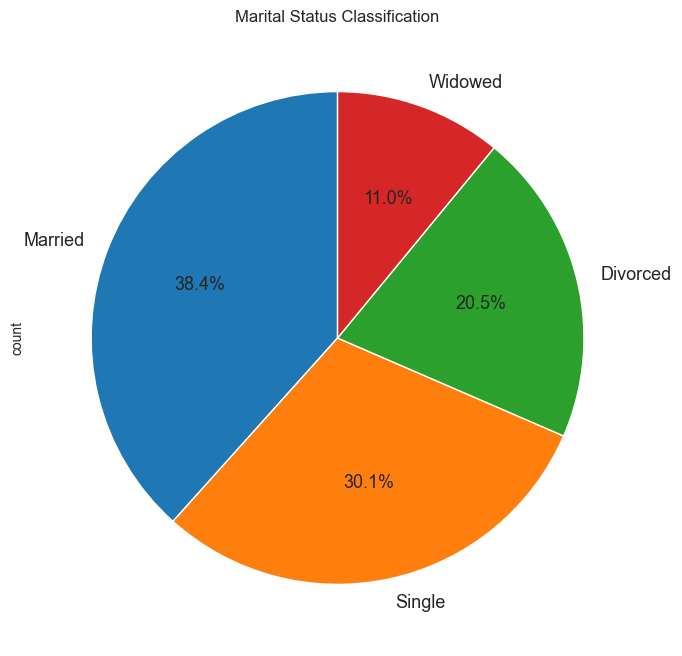

In [471]:
m_pie=df["Marital Status"].value_counts().plot(kind="pie",autopct="%1.1f%%",figsize=(10,8),startangle=90,title="Marital Status Classification",fontsize=13)

In [472]:
df.head()

,Gender,Education Level,Marital Status,Number of Dependents,Income,Credit Score,Debt-to-Income Ratio,Assets Value,Defaults Records,Employment Status,Years in Current Job,Loan Granted,Age Group
0,Female,Bachelor's,Divorced,2,56789,715,0.25,158765,2,Employed,6,yes,(31-40)
1,Non-binary,Master's,Single,3,91234,789,0.18,176543,0,Employed,10,yes,(31-40)
2,Male,Bachelor's,Divorced,1,65432,723,0.25,134567,1,Employed,6,yes,(41-50)
3,Male,Master's,Single,0,92345,801,0.15,192345,0,Employed,10,yes,(31-40)
4,Female,Master's,Married,1,76543,756,0.22,162345,0,Employed,8,yes,(31-40)


## Education Status Classification

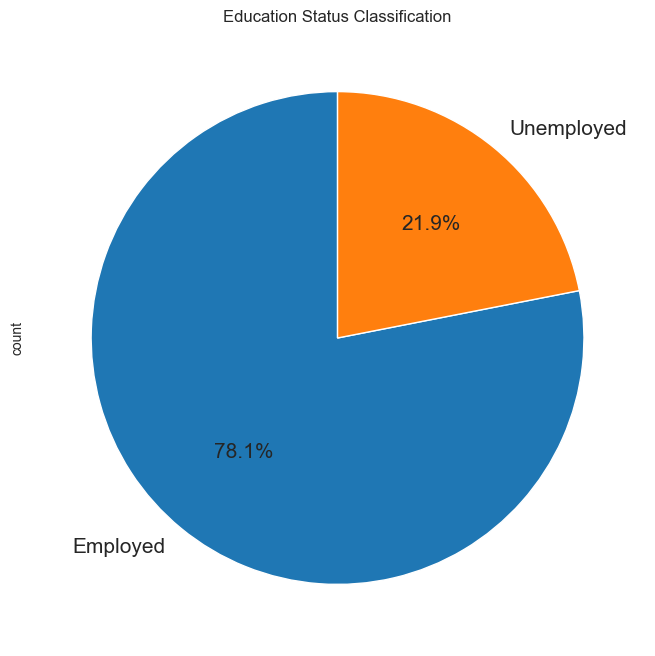

In [473]:
e_pie=df["Employment Status"].value_counts().plot(kind="pie",autopct="%1.1f%%",figsize=(10,8),startangle=90,title="Education Status Classification",fontsize=15)

## Income classification based on marital status and gender

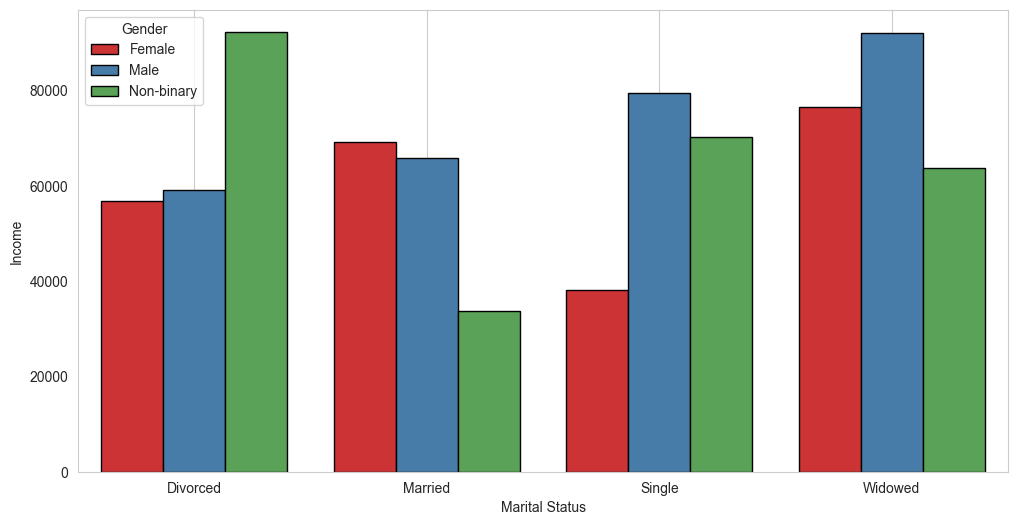

In [474]:
classifi_income=df.groupby(["Gender","Marital Status","Income"]).size().reset_index(name="count")
classifi_income
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.barplot(data=classifi_income,x="Marital Status",y="Income",hue="Gender",edgecolor="black",palette="Set1",ci=None)
plt.grid()
plt.show()

## Histogram Distribution
### Risk Factor Factor Manegment Based On Marital Status

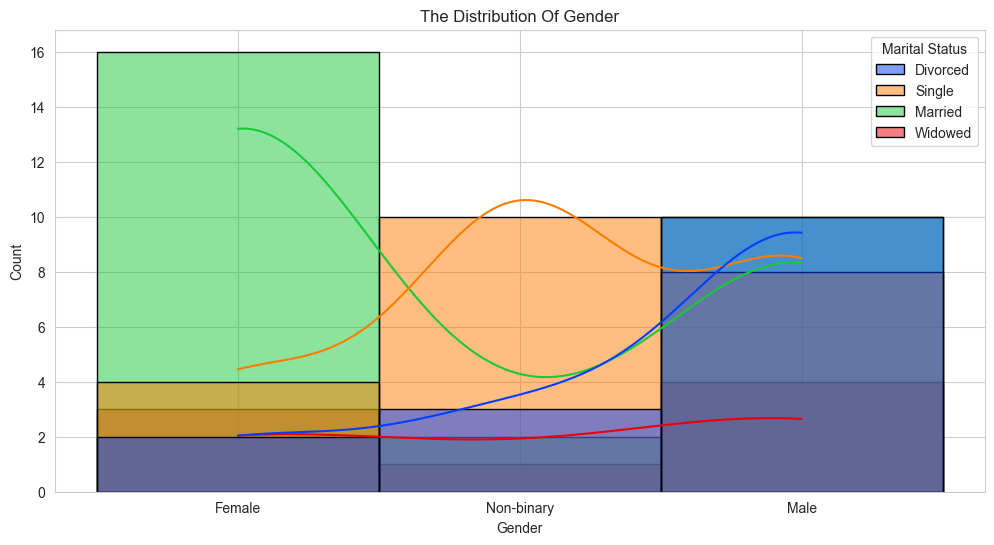

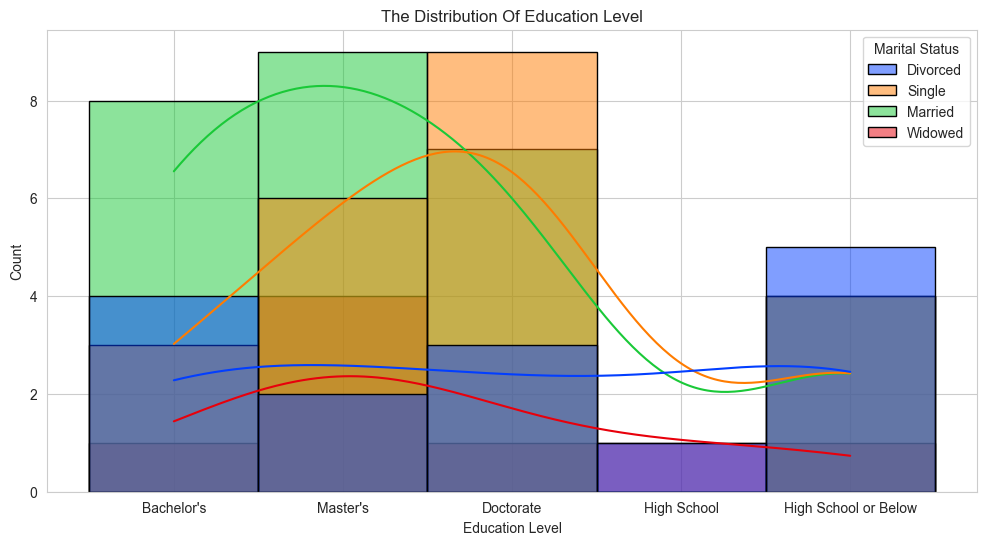

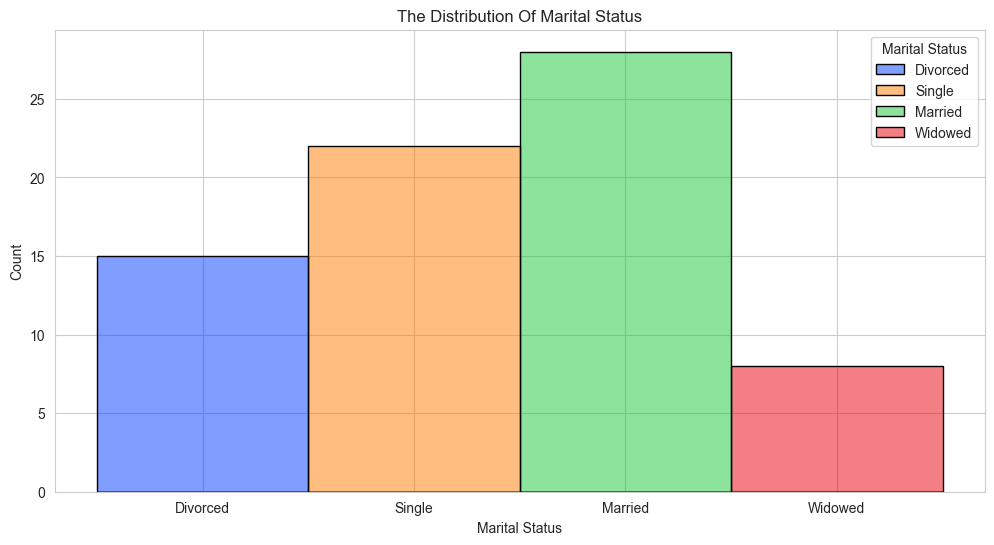

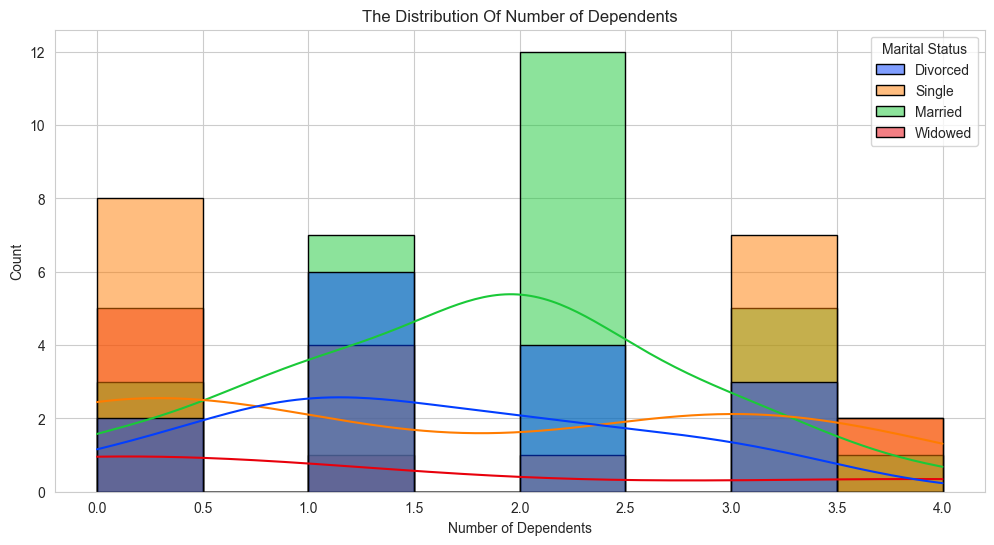

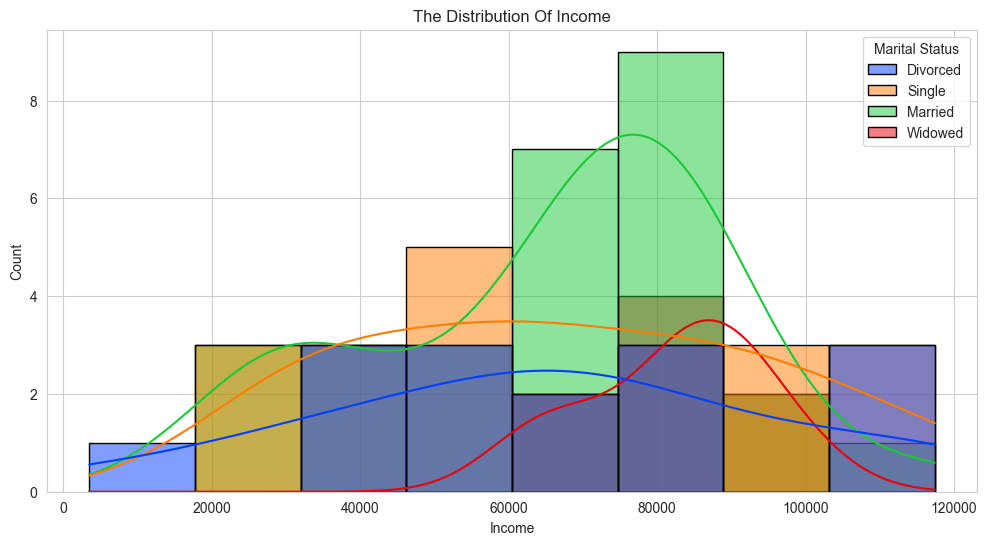

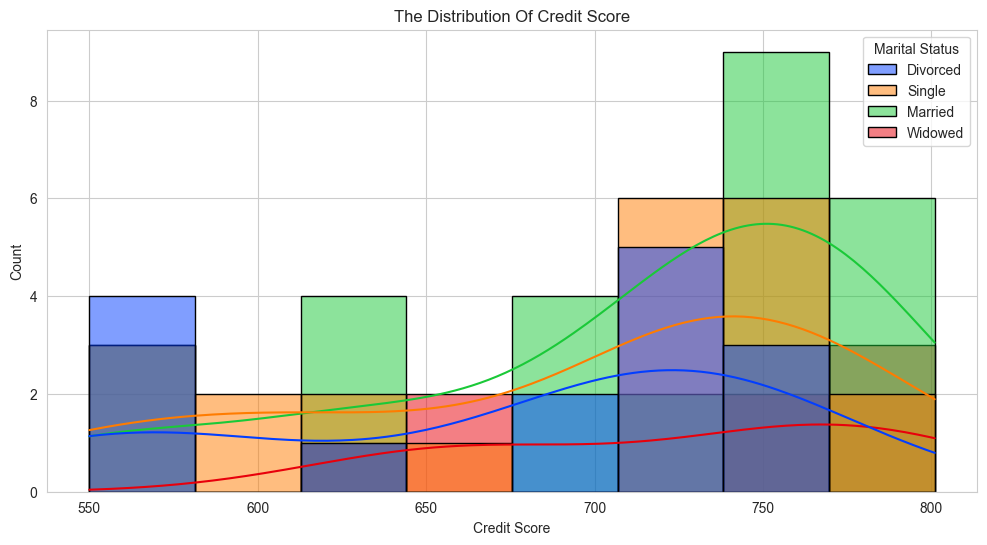

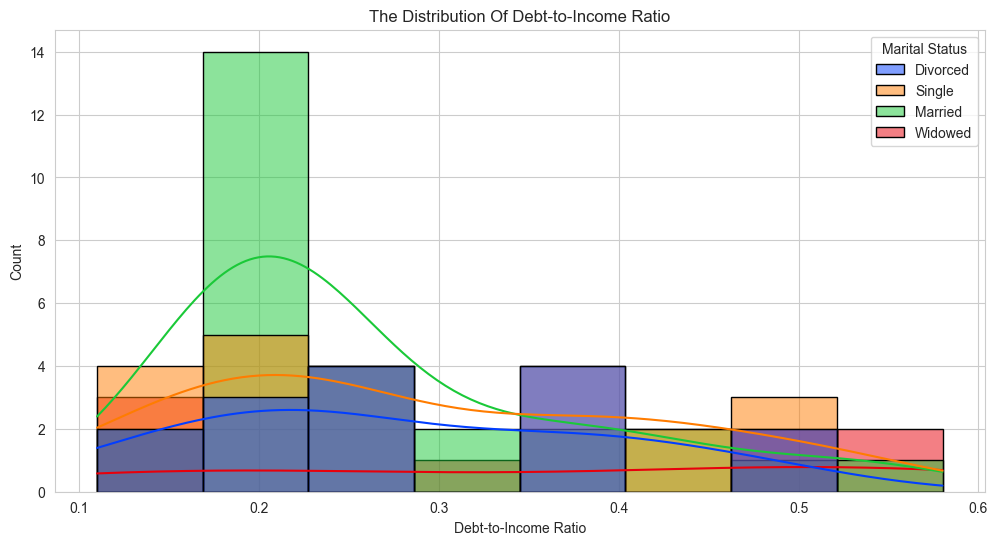

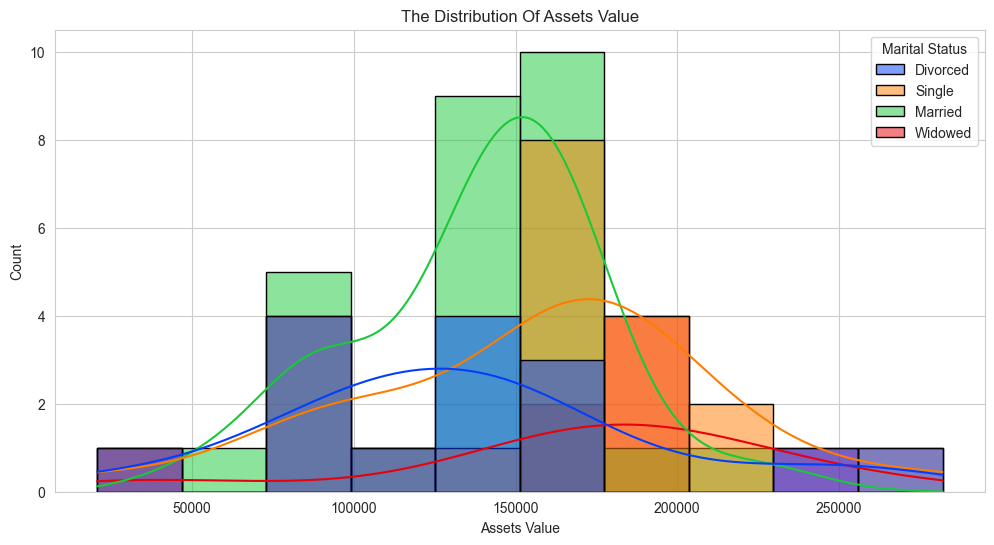

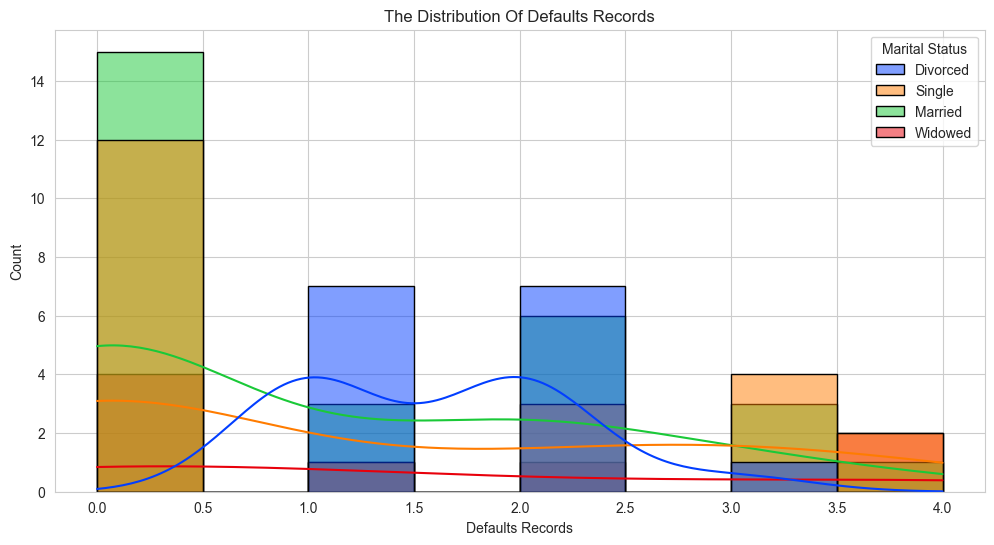

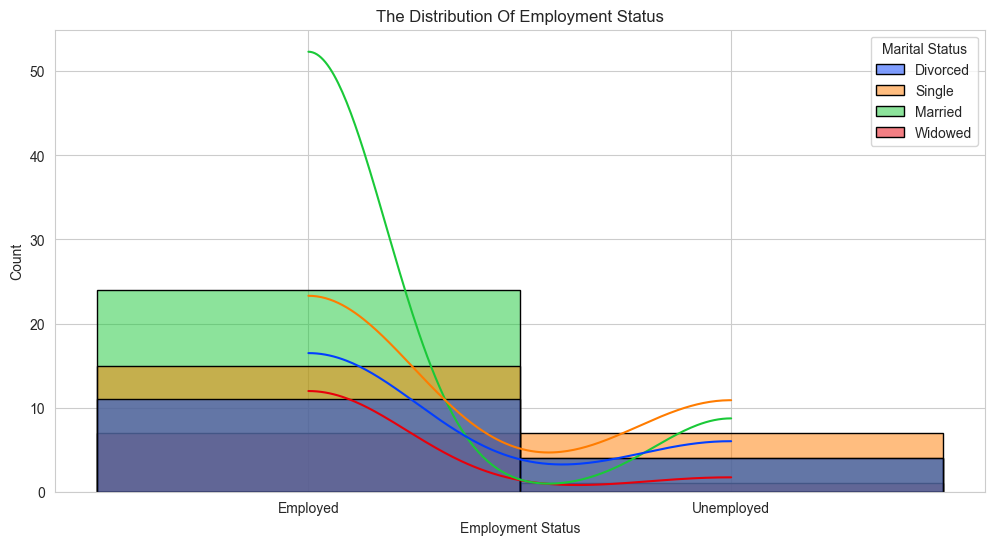

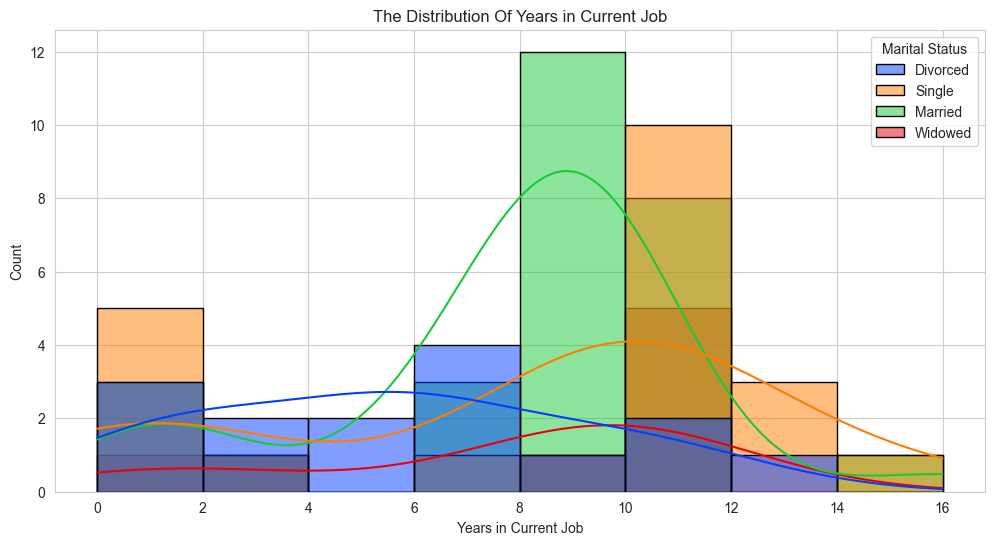

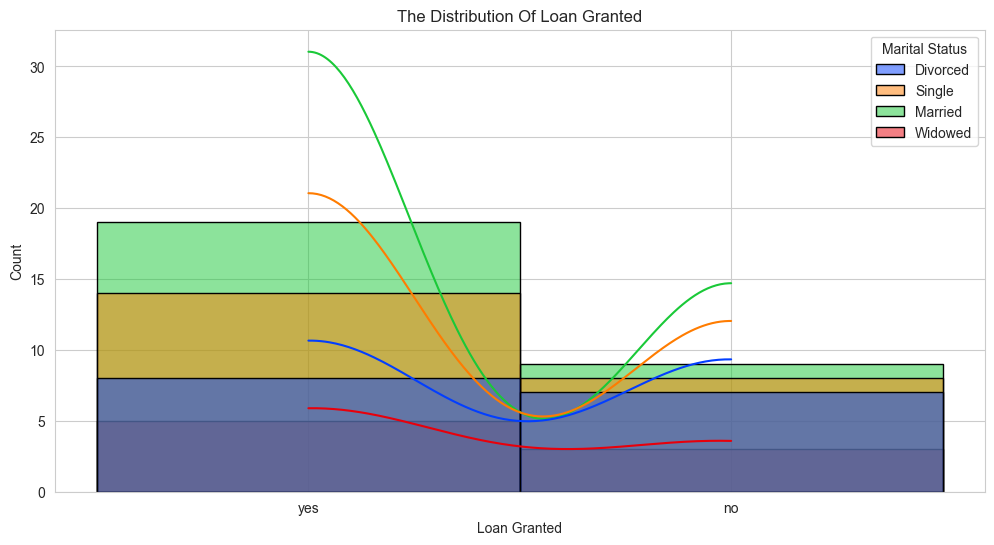

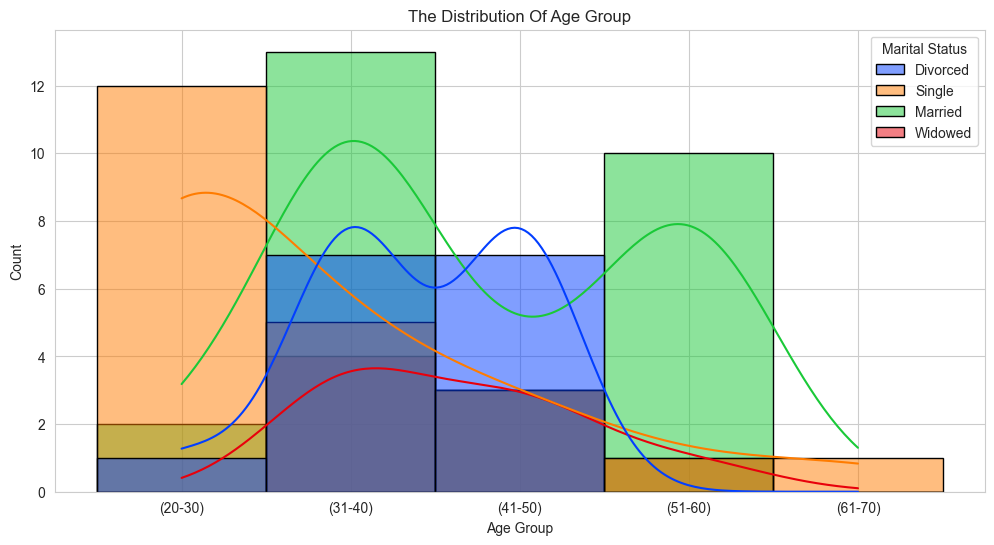

In [475]:
for col in df:
    plt.figure(figsize=(12,6))
    sns.histplot(data=df,x=col,kde=True,hue="Marital Status",palette="bright",edgecolor="black")
    plt.title(f"The Distribution Of {col}")
    plt.show()


## Loan Providance Classification Based On Credit Score And Marital Status

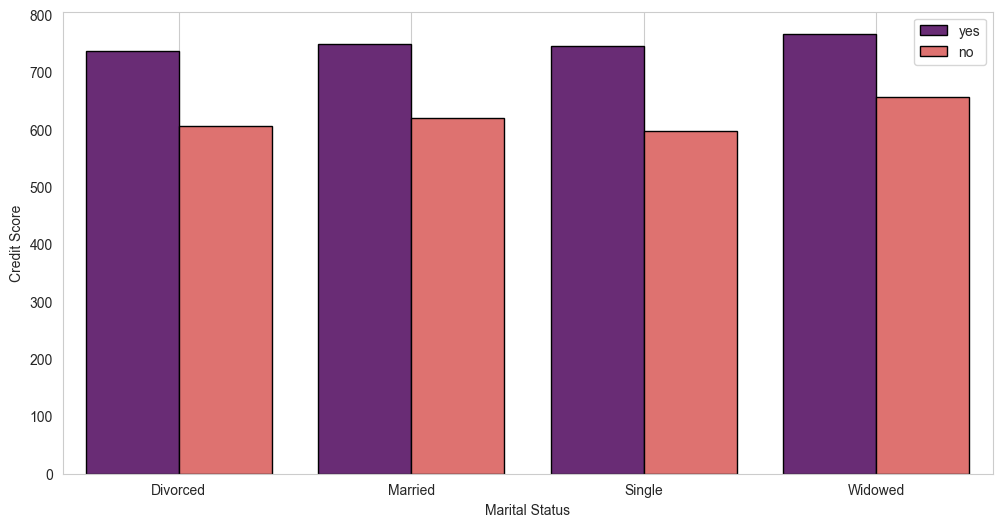

In [476]:
classifi_loang=df.groupby(["Gender","Marital Status","Credit Score","Loan Granted"]).size().reset_index(name="count")
classifi_loang
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.barplot(data=classifi_loang,x="Marital Status",y="Credit Score",hue="Loan Granted",edgecolor="black",palette="magma",ci=None)
plt.grid()
plt.legend()
plt.show()

## Loan Providance Classification Based On Assets Value And Number Of Dependents

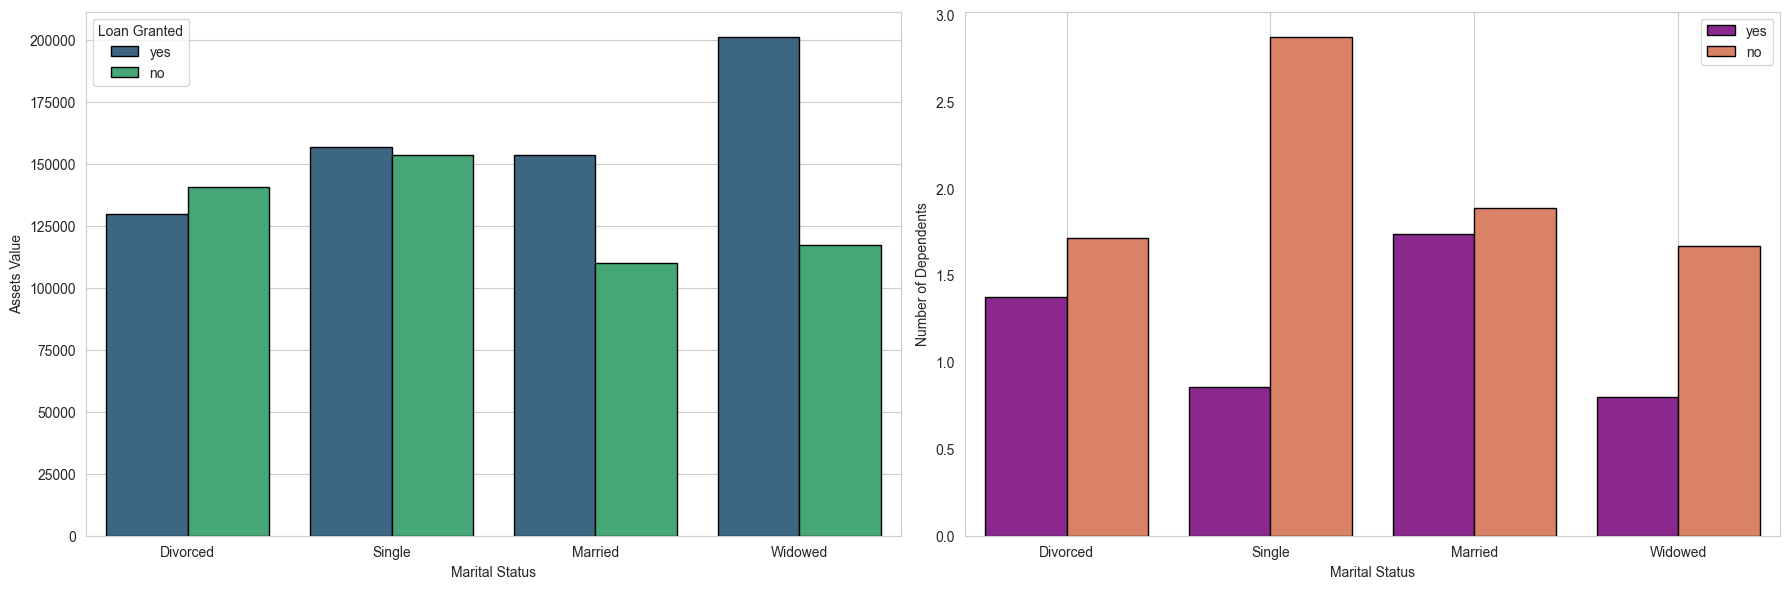

In [477]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.set_style("whitegrid")
sns.barplot(data=df,x="Marital Status",y="Assets Value",hue="Loan Granted",edgecolor="black",palette="viridis",ci=None)
plt.subplot(1,2,2)
sns.barplot(data=df,x="Marital Status",y="Number of Dependents",hue="Loan Granted",edgecolor="black",palette="plasma",ci=None)
plt.grid()
plt.tight_layout()
plt.legend()
plt.show()

## Alternate Visualization For Better Understanding

Text(0.5, 1.0, 'Loan Classification Based on Assets and Dependents')

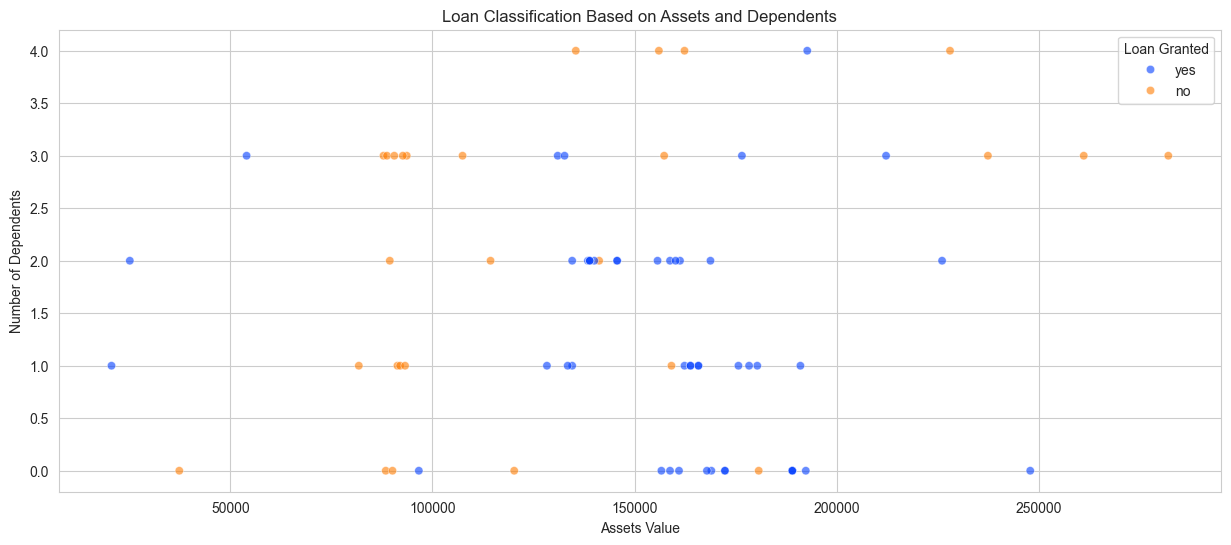

In [478]:
classifi_val=df.groupby(["Gender","Marital Status","Age Group","Number of Dependents","Assets Value","Loan Granted"]).size().reset_index(name="count")
classifi_val
plt.figure(figsize=(15,6))
sns.scatterplot(
    data=df,
    x="Assets Value",
    y="Number of Dependents",
    hue="Loan Granted",
    alpha=0.6,
    palette="bright"
)
plt.title("Loan Classification Based on Assets and Dependents")


## Loan Providance Classification Based On Marital Satatus & Default Records

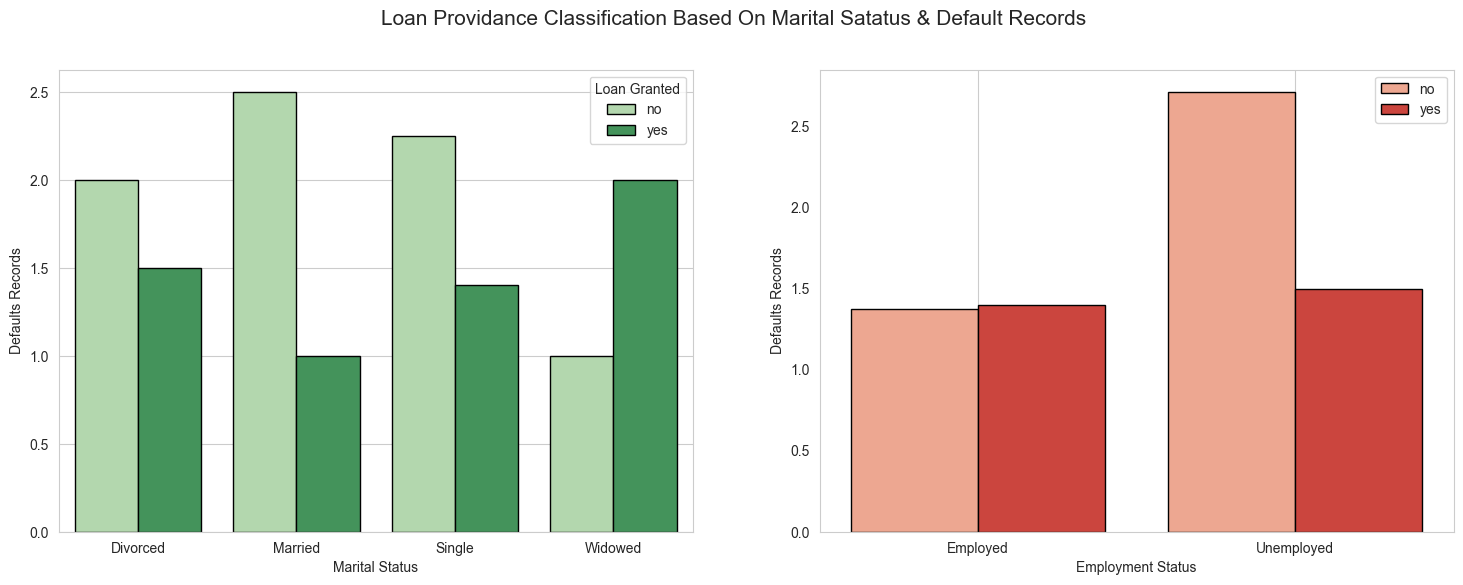

In [479]:
classifi_def=df.groupby(['Marital Status',"Defaults Records","Loan Granted","Employment Status"]).size().reset_index(name="count")
classifi_def
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.set_style("whitegrid")
sns.barplot(data=classifi_def,x="Marital Status",y="Defaults Records",hue="Loan Granted",edgecolor="black",palette="Greens",ci=None)
plt.subplot(1,2,2)
sns.barplot(data=classifi_def,x="Employment Status",y="Defaults Records",hue="Loan Granted",edgecolor="black",palette="Reds",ci=None)
plt.grid()
plt.legend()
plt.suptitle("Loan Providance Classification Based On Marital Satatus & Default Records",size=15)
plt.show()

## Loan Providance Classification Based On Debt To Income Ratio And Employment Status

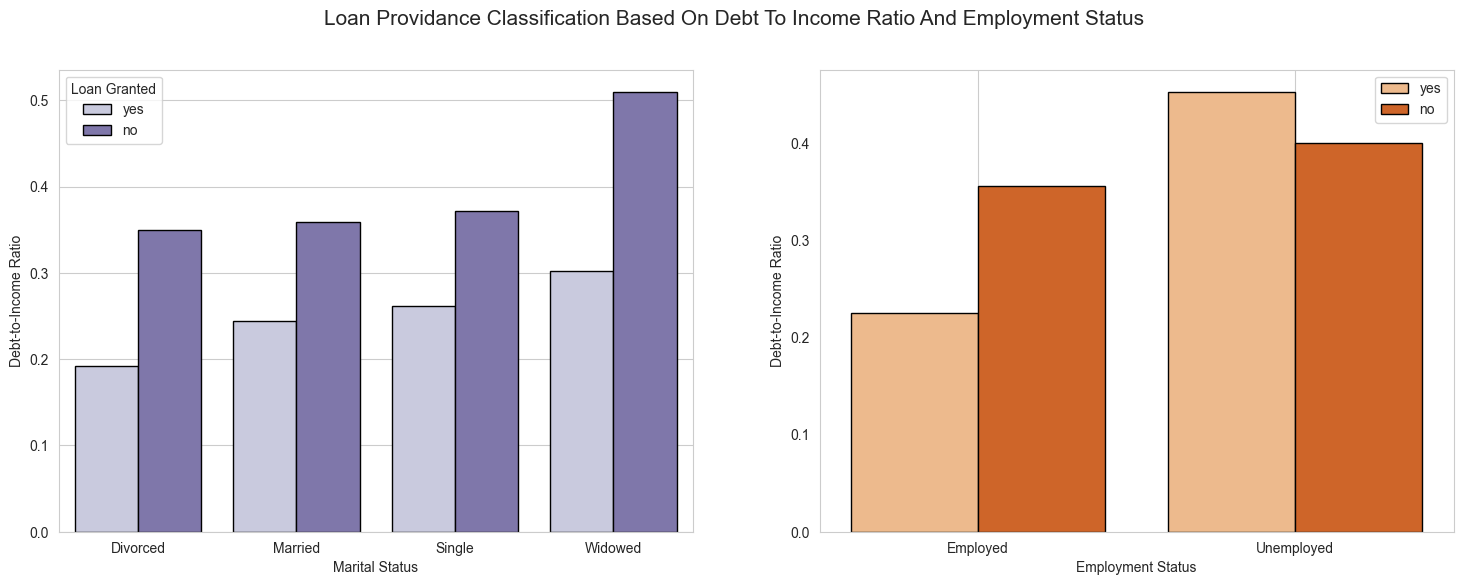

In [480]:
classifi_em=df.groupby(['Marital Status',"Debt-to-Income Ratio","Loan Granted","Employment Status"]).size().reset_index(name="count")
classifi_em
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.set_style("whitegrid")
sns.barplot(data=classifi_em,x="Marital Status",y="Debt-to-Income Ratio",hue="Loan Granted",edgecolor="black",palette="Purples",ci=None)
plt.subplot(1,2,2)
sns.barplot(data=classifi_em,x="Employment Status",y="Debt-to-Income Ratio",hue="Loan Granted",edgecolor="black",palette="Oranges",ci=None)
plt.grid()
plt.legend()
plt.suptitle("Loan Providance Classification Based On Debt To Income Ratio And Employment Status",size=15)
plt.show()

## Correlation Heatmap

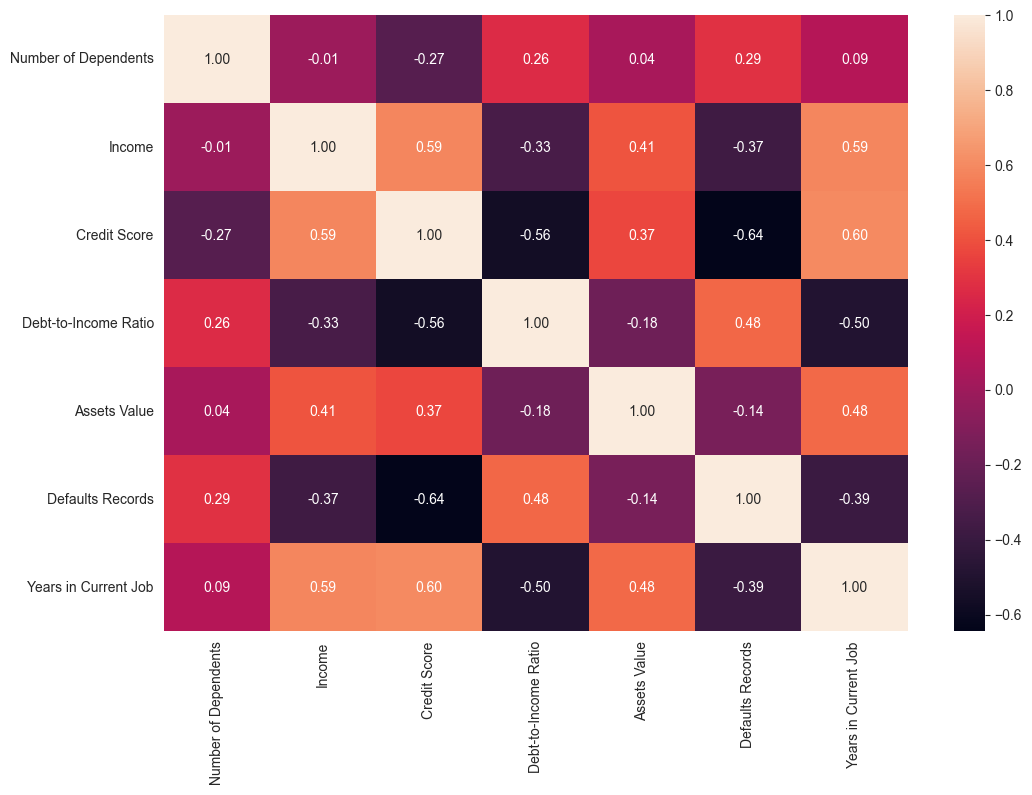

In [481]:
cor=df.select_dtypes(include="number").corr()
plt.figure(figsize=(12,8))
sns.heatmap(data=cor,annot=True,fmt=".2f")
plt.show()

# Machine Learning

In [482]:
df.columns

Index(['Gender', 'Education Level', 'Marital Status', 'Number of Dependents',
       'Income', 'Credit Score', 'Debt-to-Income Ratio', 'Assets Value',
       'Defaults Records', 'Employment Status', 'Years in Current Job',
       'Loan Granted', 'Age Group'],
      dtype='object')

In [483]:
df.head()

,Gender,Education Level,Marital Status,Number of Dependents,Income,Credit Score,Debt-to-Income Ratio,Assets Value,Defaults Records,Employment Status,Years in Current Job,Loan Granted,Age Group
0,Female,Bachelor's,Divorced,2,56789,715,0.25,158765,2,Employed,6,yes,(31-40)
1,Non-binary,Master's,Single,3,91234,789,0.18,176543,0,Employed,10,yes,(31-40)
2,Male,Bachelor's,Divorced,1,65432,723,0.25,134567,1,Employed,6,yes,(41-50)
3,Male,Master's,Single,0,92345,801,0.15,192345,0,Employed,10,yes,(31-40)
4,Female,Master's,Married,1,76543,756,0.22,162345,0,Employed,8,yes,(31-40)


In [484]:
le=LabelEncoder()
cols_to_encode=['Education Level', 'Marital Status','Employment Status','Loan Granted',]
for colss in cols_to_encode:
    df[colss]=le.fit_transform(df[colss])

In [485]:
df.head()

,Gender,Education Level,Marital Status,Number of Dependents,Income,Credit Score,Debt-to-Income Ratio,Assets Value,Defaults Records,Employment Status,Years in Current Job,Loan Granted,Age Group
0,Female,0,0,2,56789,715,0.25,158765,2,0,6,1,(31-40)
1,Non-binary,4,2,3,91234,789,0.18,176543,0,0,10,1,(31-40)
2,Male,0,0,1,65432,723,0.25,134567,1,0,6,1,(41-50)
3,Male,4,2,0,92345,801,0.15,192345,0,0,10,1,(31-40)
4,Female,4,1,1,76543,756,0.22,162345,0,0,8,1,(31-40)


In [486]:
scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Transform test data using same parameters
x_test_scaled = scaler.transform(x_test)

In [487]:
ml_cols=df.drop(columns=["Gender","Loan Granted","Age Group"])
x=ml_cols
y=df["Loan Granted"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [488]:
model=LogisticRegression()
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [489]:
y_pred=model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.73


In [490]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.80      0.80      0.80        10

    accuracy                           0.73        15
   macro avg       0.70      0.70      0.70        15
weighted avg       0.73      0.73      0.73        15



## New Data For Prediction

In [491]:
new_data = pd.DataFrame({
    "Education Level": [4],
    "Marital Status": [0],
    "Number of Dependents": [4],
    "Income": [40000],
    "Credit Score": [720],
    "Debt-to-Income Ratio": [0.36],
    "Assets Value": [10000],
    "Defaults Records": [2],
    "Employment Status": [1],
    "Years in Current Job": [3]
})
prediction=model.predict(new_data)
print(f"The Person will Not Get A Loan {prediction}")

The Person will Not Get A Loan [0]
